In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community


data = pd.read_csv(r"C:\Users\alpie\Documents\SocialGraphs\Project\employee_reviews.csv", low_memory=False)

In [3]:
companies = data['company'].unique()
print("Unique values in 'type' column:", companies)

Unique values in 'type' column: ['google' 'amazon' 'facebook' 'netflix' 'apple' 'microsoft']


In [4]:
job_title = data['job-title'].unique()
print("Unique values in 'type' column:", job_title)

Unique values in 'type' column: ['Current Employee - Anonymous Employee'
 'Former Employee - Program Manager'
 'Current Employee - Software Engineer III' ...
 'Current Employee - Programmer Manager'
 'Former Employee - Senior Project Managet'
 'Current Employee - Technical Sales Manager']


In [5]:
relevant_columns = ['company', 'dates', 'job-title', 'summary', 'pros', 'cons', 'advice-to-mgmt', 'overall-ratings']
filtered_data = data[relevant_columns]

In [6]:
# Ensure datetime format
filtered_data['dates'] = pd.to_datetime(filtered_data['dates'], errors='coerce')

C:\Users\alpie\AppData\Local\Temp\ipykernel_14232\2177077318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['dates'] = pd.to_datetime(filtered_data['dates'], errors='coerce')


In [7]:
filtered_data = filtered_data.dropna(subset=['dates', 'overall-ratings'])

In [8]:
#Categorize data into pre-2016 and 2016-onwards
filtered_data['date_category'] = filtered_data['dates'].apply(lambda x: 'Pre-2016' if x.year < 2016 else '2016+')

In [9]:
# Group by company and date category, calculating the average rating
grouped_data = filtered_data.groupby(['company', 'date_category'])['overall-ratings'].mean().reset_index()

In [10]:
print("Average Overall Ratings Per Company Per Date Category:")
print(grouped_data)

Average Overall Ratings Per Company Per Date Category:
      company date_category  overall-ratings
0      amazon         2016+         3.675033
1      amazon      Pre-2016         3.333333
2       apple         2016+         3.987489
3       apple      Pre-2016         3.925103
4    facebook         2016+         4.461538
5    facebook      Pre-2016         4.575071
6      google         2016+         4.409351
7      google      Pre-2016         4.258616
8   microsoft         2016+         4.013188
9   microsoft      Pre-2016         3.679811
10    netflix         2016+         3.574830
11    netflix      Pre-2016         3.316505


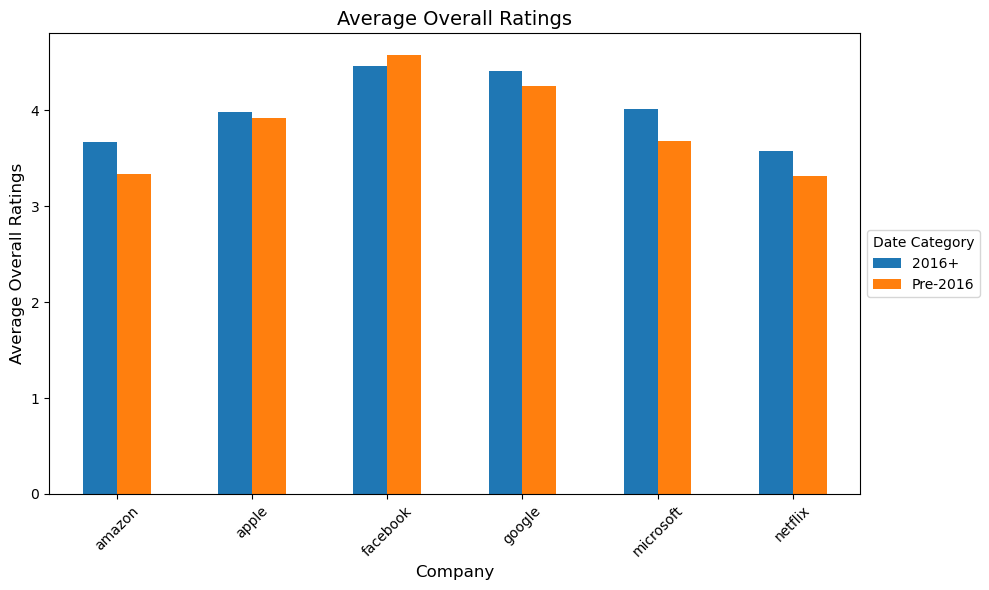

In [11]:
# Group by company and date category, then calculate the average 'overall-ratings'
grouped_data = filtered_data.groupby(['company', 'date_category'])['overall-ratings'].mean().reset_index()

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='company', columns='date_category', values='overall-ratings')

# Create a bar plot
pivot_data.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title("Average Overall Ratings", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Average Overall Ratings", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Date Category", loc='center left', bbox_to_anchor=(1.0, 0.5))  # Legend to the right
plt.tight_layout()

# Show the plot
plt.show()


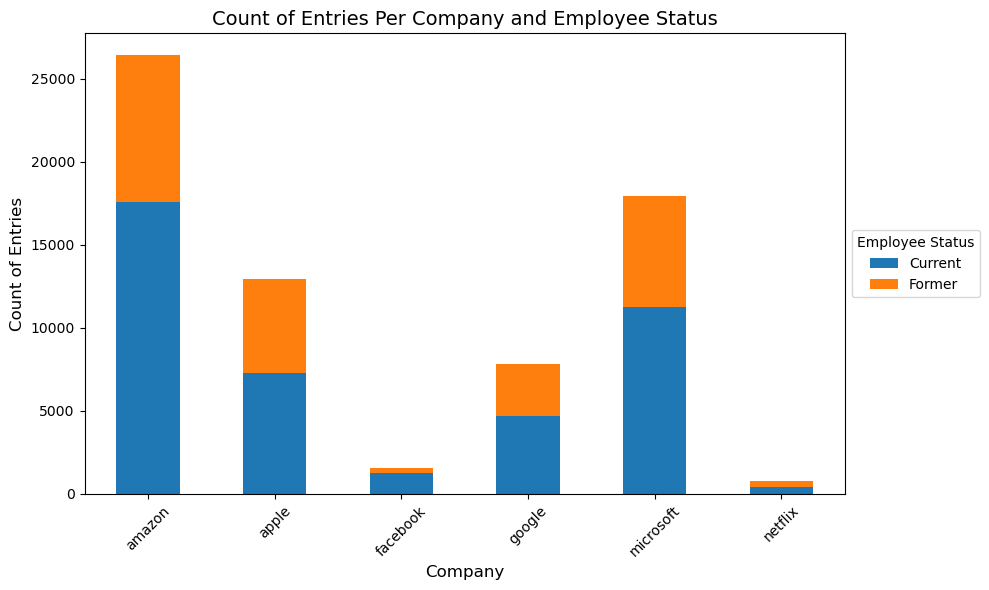

In [13]:
filtered_data['employee_status'] = filtered_data['job-title'].apply(lambda x: str(x).split(' ')[0])

# Group the data by company and employee status
count_data = filtered_data.groupby(['company', 'employee_status']).size().reset_index(name='count')

pivot_count_data = count_data.pivot(index='company', columns='employee_status', values='count')

pivot_count_data.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title("Count of Entries Per Company and Employee Status", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Count of Entries", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Employee Status", loc='center left', bbox_to_anchor=(1.0, 0.5))  # Legend to the right
plt.tight_layout()

plt.show()
